

# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analyzing data collected from 100k medical appointments in Brasil. The analysis is focused on identifying trends influencing patients to either show up for their appointments or not using their demographic data and some other distinct features. 

### Dataset Description 

This is a brief description of the data used for this analysis.
PatientId - unique number given to a patient.
AppointmentID - unique identifier for an appointment.
Gender - tells us the sex of the patient. 'M' for Male and 'F' for female.
ScheduleDay - tells us on what day the patient set their appointment.
AppointmentDay - tells us the actual date of the appointment.
Age - How old the patient is.
Neighbourhood - this indicates the location of the hospital.
Scholarship - indicates whether or not the patient is enrolled in Brasilian welfare program.
Hipertension - indicates whether or not the patient is hypertensive or not.
Diabetes - indicates whether the patient is diabetic or not.
Handcap - indicates whether or not the patient is handicapped or not.
SMS_received - tells us if the patient received an SMS or not. '0' if the patient didnt and '1' if they did.
No-show - Tells us whether the patient showed up for their appointment or not. 'Yes' if they didn't and 'No' if they did.


### Question(s) for Analysis


1. Can a patient's gender predict if they would show up for their scheduled appointment?
2. Are patients more likely to show up if they recieve an SMS notification?
3. Which Age group is most likely to miss their appointments?
4. Which neighbourhood had the most no-shows?

In [1]:
# importing packages I intend to use

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_rows = 9999

# including a magic word so my visualiztions are plotted in the notebook
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

In this section, I will be loading my data and viewing it's various datatypes while keeping an eye out for any possibly errant data.



In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df_noshow = pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')

#   types and look for instances of missing or possibly errant data.
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df_noshow.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
len(df_noshow.columns)

14

In [7]:
df_noshow.loc[:, ['PatientId', 'AppointmentID']].nunique()

PatientId         62299
AppointmentID    110527
dtype: int64

This dataset contains 14 columns and 110527 data rows. There are no null fields in this dataset


### Data Cleaning
The output showed that in the Age column, the youngest person is -1 and the oldest is 115 years old. I am therefore going to plot a boxplot to visually identify any other outliers. 
 

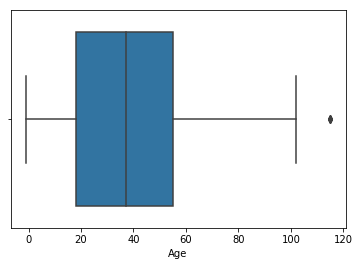

In [8]:
sns.boxplot(df_noshow.Age)
plt.show()

The boxplot shows that there are outliers after 100 but doesn't identify any under 0.

In [9]:
#return all entries above 100 in the Age column
df_noshow [df_noshow.Age > 100]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
58014,9.762948e+14,5651757,F,2016-05-03T09:14:53Z,2016-05-03T00:00:00Z,102,CONQUISTA,0,0,0,0,0,0,No
63912,3.196321e+13,5700278,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,3.196321e+13,5700279,F,2016-05-16T09:17:44Z,2016-05-19T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,3.196321e+13,5562812,F,2016-04-08T14:29:17Z,2016-05-16T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,3.196321e+13,5744037,F,2016-05-30T09:44:51Z,2016-05-30T00:00:00Z,115,ANDORINHAS,0,0,0,0,1,0,No
90372,2.342836e+11,5751563,F,2016-05-31T10:19:49Z,2016-06-02T00:00:00Z,102,MARIA ORTIZ,0,0,0,0,0,0,No
97666,7.482346e+14,5717451,F,2016-05-19T07:57:56Z,2016-06-03T00:00:00Z,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [10]:
#return all entries less than 0 in the Age column
df_noshow [df_noshow.Age < 0]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


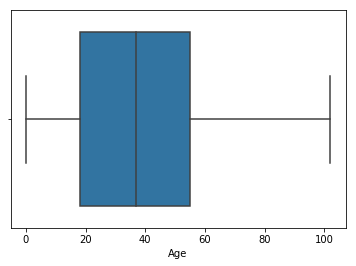

In [11]:
df_noshow = df_noshow[(df_noshow.Age > -1) & (df_noshow.Age < 115)]

sns.boxplot(df_noshow.Age)
plt.show()

The boxplot shows that the outliers have been succesfully removed and I now have data in close range to work with.The dataset now has 110521 entries and 14 columns.

In [12]:
df_noshow.shape

(110521, 14)

I observed that some column names are wrongly spelt. Not like this has any effect on the output but I'll be correcting the column names (Hipertension, Handcap) just so it's easier to understand.

In [13]:

#rename the Hipertension column 
df_noshow.rename(columns={'Hipertension' :'Hypertension'}, inplace=True)


In [14]:

#rename the Handcap column 
df_noshow.rename(columns={'Handcap' :'Handicap'}, inplace=True)


In [15]:
#rename the No-show column 
df_noshow.rename(columns={'No-show' :'NoShow'}, inplace=True)
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
#convert ScheduleDay to DateTime type
df_noshow.AppointmentDay = pd.to_datetime(df_noshow.AppointmentDay)
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


This output shows that the column names have now been corrected.

In [17]:
#convert ScheduleDay to datetime type
df_noshow.ScheduledDay = pd.to_datetime(df_noshow.ScheduledDay)
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


AppointmentDay and ScheduledDay are now in datetime format.

I also observed that handcap has more than two values.The min value is 0 and the maximum is 4.
A quick look at the data source on kaggle showed that the values for handcap indicates how many handicaps a patient has and not if the patient has a handicap or not.

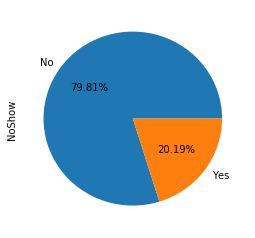

In [18]:
#plot of Noshow to appointments as a piechart. autopct was used to format the decimal places
df_noshow.NoShow.value_counts().plot(kind ='pie', figsize = (4,4), autopct='%.2f%%')

The piechart depicts that only 20.19% of appointments resulted in NoShow and a larger percentage of the scheduled appointments were honoured by the patients. 

I will be dividing the patients into two groups: 
Show - the ones who showed up for their appointments
Didnt_Show - the ones that didn't show up for their Appointment

In [19]:
Show=df_noshow.NoShow=='No'
Didnt_Show=df_noshow.NoShow=='Yes'
df_noshow[Show].count()

PatientId         88205
AppointmentID     88205
Gender            88205
ScheduledDay      88205
AppointmentDay    88205
Age               88205
Neighbourhood     88205
Scholarship       88205
Hypertension      88205
Diabetes          88205
Alcoholism        88205
Handicap          88205
SMS_received      88205
NoShow            88205
dtype: int64

In [20]:
df_noshow[Didnt_Show].count()

PatientId         22316
AppointmentID     22316
Gender            22316
ScheduledDay      22316
AppointmentDay    22316
Age               22316
Neighbourhood     22316
Scholarship       22316
Hypertension      22316
Diabetes          22316
Alcoholism        22316
Handicap          22316
SMS_received      22316
NoShow            22316
dtype: int64

Question: Is there a correlation between persons who show up for their appointments and Receiving SMS


In [21]:
df_noshow[Show].mean()

PatientId        1.476754e+14
AppointmentID    5.681134e+06
Age              3.778875e+01
Scholarship      9.390624e-02
Hypertension     2.043875e-01
Diabetes         7.383935e-02
Alcoholism       3.041778e-02
Handicap         2.273114e-02
SMS_received     2.913327e-01
dtype: float64

In [22]:
df_noshow[Didnt_Show].mean()

PatientId        1.467677e+14
AppointmentID    5.652258e+06
Age              3.430682e+01
Scholarship      1.155225e-01
Hypertension     1.690267e-01
Diabetes         6.407958e-02
Alcoholism       3.033698e-02
Handicap         2.016490e-02
SMS_received     4.384298e-01
dtype: float64

From the output, the mean age for patients who made it for their appointments is 37, whereas, the mean age for those who didn't is 34.

In [23]:
# Define a function that would help us chart the stacked barcharts and avoid repeating code
def plot_bar_chart(title, xfield):
    df_noshow.groupby(xfield)["NoShow"].value_counts().unstack().plot(kind="bar", stacked=True)
    plt.legend(["Showed","No Show"]);
    plt.ylabel('Total Appointments');
    plt.title(title)

### Question 1:  Can a patient's gender predict if they would show up for their scheduled appointment?

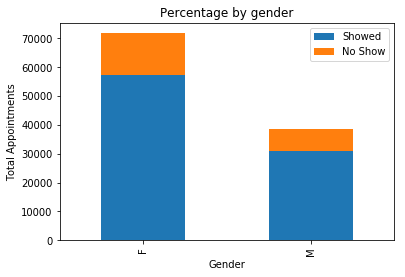

In [24]:
title = "Percentage by gender"
xfield = "Gender"

plot_bar_chart(title, xfield)

From the chart and considering the percentage of female to male patients, there is no correlation between gender and missing scheduled appointments.

### Question 2:  Are patients more likely to show up if they recieve an SMS notification?

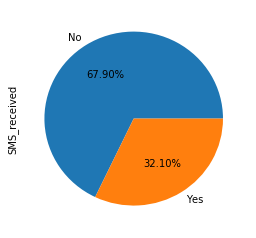

In [25]:
#determining how many patients received SMS Notification
YS={1:'Yes', 0:'No'}
df_noshow.SMS_received.map(YS).value_counts().plot(kind ='pie', figsize = (4,4), autopct='%.2f%%')

A larger percentage of patients didn't receive SMS notifications

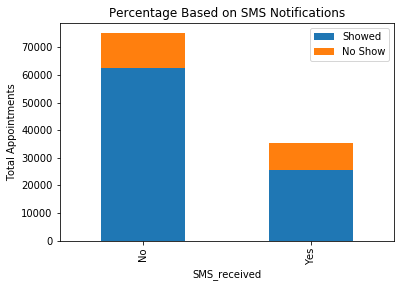

In [26]:
title = 'Percentage Based on SMS Notifications'
xfield = "SMS_received"

plot_bar_chart(title, xfield)
plt.xticks([0, 1], ['No', 'Yes']);

From the chart, I can deduce that most patients who received SMS notifications are more likely to miss their appointment. Hence, receiving an SMS notification is not likely to influence a patient to show up for their appointment.

In [27]:
# Define a function that would help us chart the countplots and avoid repeating code
def chart_countplot(title, xfield):
    ax = sns.countplot(x=xfield, data=df_noshow[Didnt_Show])
    plt.title(title)
    plt.ylabel("Total No Show");
    return ax

### Question 3:  Which Age group is most likely to miss their appointments?

In [28]:
#getting the description of the Age column of this data
df_noshow['Age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

In [29]:
df_noshow.Age.mean()

37.08569412147918

In [30]:
# bin edges that will be used to "cut" the Agedata into groups
bin_edges = [0, 18, 37, 55, 115]
# labels for the four age groups
bin_names = ['0-18','19-37','38-54','55 and above']
age_group = pd.cut(df_noshow['Age'], bin_edges, labels=bin_names)
# insert a new column (age_group) before column 7
df_noshow.insert(6, 'Age_Group', age_group)
df_noshow.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Age_Group,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,NoShow
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,55 and above,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,55 and above,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,55 and above,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,0-18,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,55 and above,JARDIM DA PENHA,0,1,1,0,0,0,No


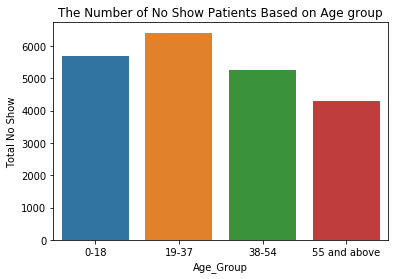

In [31]:
# Using the plot_chart function

title = 'The Number of No Show Patients Based on Age group'
xfield = "Age_Group"

chart_countplot(title, xfield)

From the displayed chart, patients between the ages of 19-37 are most likely to miss their appointments while patients 55 and above recorded the least Noshows. 

### Question 4:  Which neighbourhood had the most no-shows?

[Text(0,0,'GOIABEIRAS'),
 Text(0,0,'NOVA PALESTINA'),
 Text(0,0,'CONQUISTA'),
 Text(0,0,'SÃO CRISTÓVÃO'),
 Text(0,0,'GRANDE VITÓRIA'),
 Text(0,0,'ANTÔNIO HONÓRIO'),
 Text(0,0,'MARIA ORTIZ'),
 Text(0,0,'JUCUTUQUARA'),
 Text(0,0,'SANTO ANTÔNIO'),
 Text(0,0,'BELA VISTA'),
 Text(0,0,'PRAIA DO SUÁ'),
 Text(0,0,'BONFIM'),
 Text(0,0,'DA PENHA'),
 Text(0,0,'ITARARÉ'),
 Text(0,0,'SÃO PEDRO'),
 Text(0,0,'SÃO JOSÉ'),
 Text(0,0,'SANTOS DUMONT'),
 Text(0,0,'ANDORINHAS'),
 Text(0,0,'CARATOÍRA'),
 Text(0,0,'ARIOVALDO FAVALESSA'),
 Text(0,0,'TABUAZEIRO'),
 Text(0,0,'CONSOLAÇÃO'),
 Text(0,0,'MORADA DE CAMBURI'),
 Text(0,0,'SÃO BENEDITO'),
 Text(0,0,'JARDIM CAMBURI'),
 Text(0,0,'JARDIM DA PENHA'),
 Text(0,0,'CENTRO'),
 Text(0,0,'PARQUE MOSCOSO'),
 Text(0,0,'SANTA LÚCIA'),
 Text(0,0,'BENTO FERREIRA'),
 Text(0,0,'PRAIA DO CANTO'),
 Text(0,0,'FONTE GRANDE'),
 Text(0,0,'SANTO ANDRÉ'),
 Text(0,0,'REDENÇÃO'),
 Text(0,0,'SANTA TEREZA'),
 Text(0,0,'JOANA D´ARC'),
 Text(0,0,'CRUZAMENTO'),
 Text(0,0,'JESUS DE NAZ

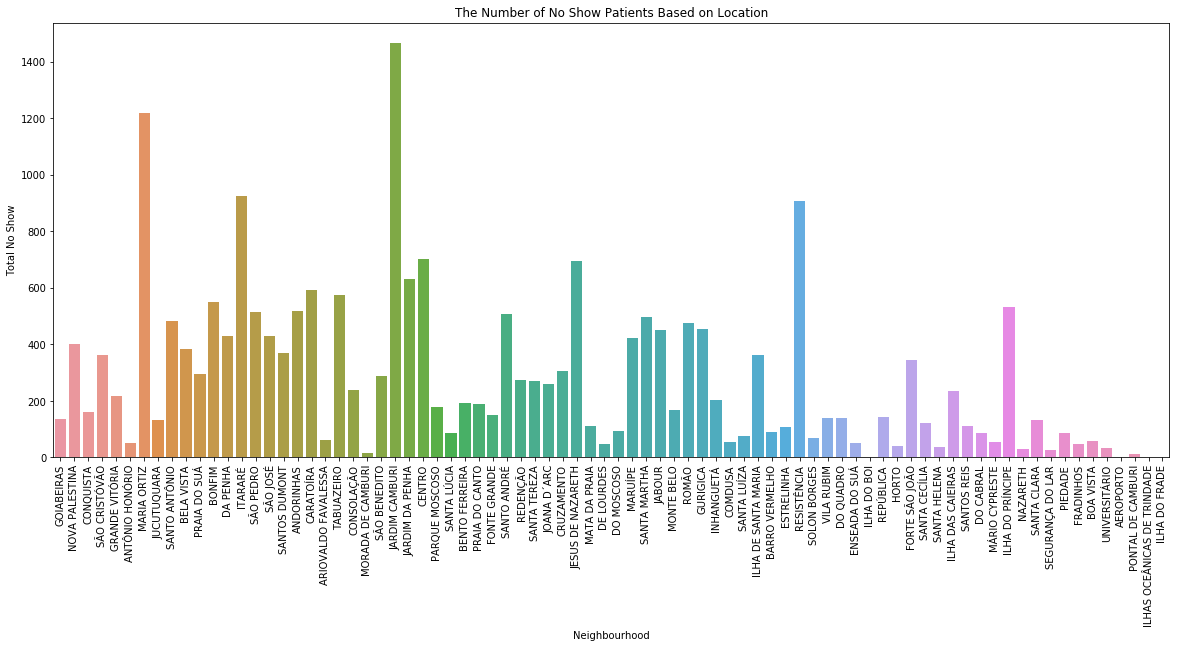

In [32]:
plt.figure(figsize = (20,8))

title = 'The Number of No Show Patients Based on Location'
xfield = "Neighbourhood"

ax = chart_countplot(title, xfield)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)

Jardim Camburi recorded the most No Shows.

In [33]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0